<a href="https://colab.research.google.com/github/quimHM/QHM_TFG_repository/blob/main/HMDA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fitter


     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=b258d9f6b09a778632d1c0a76fbd0976b2488a0d44e5589ad3f8a2899fd467db
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=0b0946b1474041a4cc1563f2b1017251fa8b2fe4eeaed946e389d0002995b10b
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from fitter import Fitter

from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)

#unpickled_df = pd.read_pickle("/content/drive/MyDrive/s170BLfdSYPp") #https://liveproject.manning.com/module/405_2_1/measuring-bias-in-a-dataset/1--load-the-hmda-dataset-into-a-pandas-dataframe/1-1-workflow%3a-load-the-hmda-dataset-into-a-pandas-dataframe?

unpickled_df = pd.read_csv("/content/drive/MyDrive/TFG/hmda/state_AL-GA_actions_taken_1-3.csv")
#extra1 = pd.read_csv("/content/drive/MyDrive/TFG/state_AR-MS_actions_taken_1-3.csv")
#extra2 = pd.read_csv("/content/drive/MyDrive/TFG/state_TN-LA_actions_taken_1-3.csv")
#unpickled_df = pd.concat([unpickled_df,extra1,extra2])

#unpickled_df = pd.read_csv("/content/drive/MyDrive/TFG/AL_jointRace_jointEthnicity.csv")

print("samples:",len(unpickled_df))
print("features:",len(unpickled_df.columns))
for c in unpickled_df.columns: 
  print(c+": ",unpickled_df.iloc[0][c])

/content/drive
Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


samples: 788548
features: 99
activity_year:  2020
lei:  7H6GLXDRUGQFU57RNE97
derived_msa-md:  12060
state_code:  GA
county_code:  13135.0
census_tract:  13135050607.0
conforming_loan_limit:  C
derived_loan_product_type:  Conventional:First Lien
derived_dwelling_category:  Single Family (1-4 Units):Site-Built
derived_ethnicity:  Not Hispanic or Latino
derived_race:  Asian
derived_sex:  Male
action_taken:  1
purchaser_type:  3
preapproval:  2
loan_type:  1
loan_purpose:  31
lien_status:  1
reverse_mortgage:  2
open-end_line_of_credit:  2
business_or_commercial_purpose:  2
loan_amount:  205000.0
loan_to_value_ratio:  68.0
interest_rate:  2.75
rate_spread:  -0.56256
hoepa_status:  2
total_loan_costs:  3003.52
total_points_and_fees:  nan
origination_charges:  1960.58
discount_points:  765.58
lender_credits:  nan
loan_term:  120
prepayment_penalty_term:  nan
intro_rate_period:  nan
negative_amortization:  2
interest_only_payment:  2
balloon_payment:  2
other_nonamortizing_features:  2
proper

(array([ 2896.,  7374., 12049., 11825., 11802., 18353., 14796., 16657.,
        17444., 17226., 26873., 21397., 26133., 25845., 26927., 31490.,
        29074., 28415., 28450., 25994., 28601., 24987., 25190., 22950.,
        22502., 22286., 19195., 17793., 16639., 14356., 15104., 12232.,
        11890., 10857.,  9816.,  9906.,  8783.,  7645.,  7630.,  6449.,
         7326.,  4905.,  4691.,  3952.,  4144.,  4053.,  3283.,  3239.,
         3418.,  2648.,  3805.,  9008.,   513.,   490.,   636.,   594.,
          552.,   518.,   511.,   412.,   587.,   430.,   435.,   433.,
          393.,   497.,   394.,   344.,   380.,   298.,   419.,   331.,
          307.,   241.,   262.,   463.,   258.,   178.,   233.,   170.,
          284.,   146.,   172.,   151.,   163.,   202.,   124.,   145.,
          154.,   100.,   191.,   106.,   127.,   105.,   124.,   110.,
          126.,    87.,   107.,   144.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.

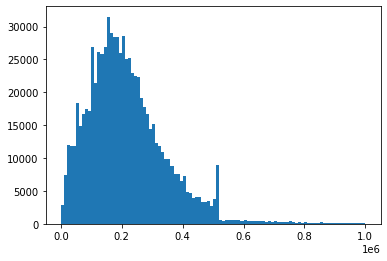

In [3]:
#print(unpickled_df.loan_amount_000s)
#plt.hist(unpickled_df.loan_amount_000s, bins=100, range=[0, 1250])
plt.hist(unpickled_df.loan_amount, bins=100, range=[0, 1000000])

In [4]:
#f = Fitter(X_test["loan_amount"], xmax=1000000,
#           distributions=['gamma', "beta", "norm"])
#f.fit()
#f.summary()a

In [5]:
#b = f.get_best()
#print(b)
#r = (np.random.beta(b["beta"]["a"],b["beta"]["b"])-b["beta"]["loc"])/b["beta"]["scale"]*1000
#print(r)

In [6]:
from scipy.stats import beta
#r = beta.rvs(b["beta"]["a"],b["beta"]["b"],b["beta"]["loc"],b["beta"]["scale"],size=100000)
#plt.hist(r, bins=100)

In [7]:
subsample = unpickled_df                    

print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==3]))
subsample = subsample.loc[subsample["action_taken"].isin([1,3])]
subsample["action_taken"] = subsample["action_taken"].replace([3],[0])    
print("action:",subsample["action_taken"].unique())
print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

print("race pre:",subsample["applicant_race-1"].unique())
subsample = subsample.loc[subsample["applicant_race-1"].isin([3,5])]
subsample["applicant_race-1"] = subsample["applicant_race-1"].replace([5,3],[0,1])
print("race:",subsample["applicant_race-1"].unique())

print("ethnicity pre:",subsample["applicant_ethnicity-1"].unique())
subsample = subsample.loc[subsample["applicant_ethnicity-1"].isin([1,2])]
subsample["applicant_ethnicity-1"] = subsample["applicant_ethnicity-1"].replace([2,1],[0,1])
print("ethnicity:",subsample["applicant_ethnicity-1"].unique())

print("sex pre",subsample["applicant_sex"].unique())
subsample = subsample.loc[subsample["applicant_sex"].isin([1,2])]
subsample["applicant_sex"] = subsample["applicant_sex"].replace([1,2],[0,1])
print("sex:",subsample["applicant_sex"].unique())


print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

print(len(subsample))
#subsample = subsample[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","applicant_ethnicity","applicant_race_1","applicant_sex",
#                           "applicant_income_000s"]]

637571 150977
action: [1 0]
637571 150977
race pre: [22.  5.  3.  6. 25. 21.  1.  2. 23. 27. 26. 24. 44.  7.  4. nan 42. 43.
 41.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


race: [0. 1.]
ethnicity pre: [ 2.  1. 14. 12. 11.  3. 13.  4. nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


ethnicity: [0. 1.]
sex pre [2 1 3 6 4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


sex: [1 0]
485315 109127
594442


In [8]:
#subsample = unpickled_df[["loan_type", "property_value", "loan_purpose", "loan_amount",
#                            "action_taken","applicant_ethnicity-1","applicant_race-1","applicant_sex",
#                           "income",'occupancy_type']]
#subsample = unpickled_df[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","action_taken_name","applicant_ethnicity","applicant_ethnicity_name","applicant_race_1","applicant_race_name_1","applicant_sex","applicant_sex_name",
#                           "applicant_income_000s",'owner_occupancy']]

#PAPER A https://www.mdpi.com/2504-4990/4/1/11
#DATA DE https://ffiec.cfpb.gov/data-browser/data/2019?category=counties&items=01001&actions_taken=1,3
#CAL TRIAR LES FEATURES? SOBRETOT, PILLAR LES derived_ethnicity, derived_race etc (https://ffiec.cfpb.gov/documentation/2018/data-browser-filters/)

"""
subsample = unpickled_df                           
subsample["action_taken"] = subsample["action_taken"].replace([3],[0])
print(subsample["action_taken_name"].unique())
print(subsample["action_taken"].unique())
print(len(subsample["action_taken"]==1),len(subsample["action_taken"]==0))

subsample = subsample.loc[((subsample["applicant_race_1"]==3) | (subsample["applicant_race_1"]==5))]
print(subsample["applicant_race_name_1"].unique())
subsample["applicant_race_1"] = subsample["applicant_race_1"].replace([5,3],[1,2])
print(subsample["applicant_race_1"].unique())

print(subsample["applicant_ethnicity_name"].unique())
subsample["applicant_ethnicity"] = subsample["applicant_ethnicity"].replace([2,1],[1,2])
print(subsample["applicant_ethnicity"].unique())

print(subsample["applicant_sex_name"].unique())
print(subsample["applicant_sex"].unique())
"""

#subsample = subsample[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","applicant_ethnicity","applicant_race_1","applicant_sex",
#                           "applicant_income_000s"]]

'\nsubsample = unpickled_df                           \nsubsample["action_taken"] = subsample["action_taken"].replace([3],[0])\nprint(subsample["action_taken_name"].unique())\nprint(subsample["action_taken"].unique())\nprint(len(subsample["action_taken"]==1),len(subsample["action_taken"]==0))\n\nsubsample = subsample.loc[((subsample["applicant_race_1"]==3) | (subsample["applicant_race_1"]==5))]\nprint(subsample["applicant_race_name_1"].unique())\nsubsample["applicant_race_1"] = subsample["applicant_race_1"].replace([5,3],[1,2])\nprint(subsample["applicant_race_1"].unique())\n\nprint(subsample["applicant_ethnicity_name"].unique())\nsubsample["applicant_ethnicity"] = subsample["applicant_ethnicity"].replace([2,1],[1,2])\nprint(subsample["applicant_ethnicity"].unique())\n\nprint(subsample["applicant_sex_name"].unique())\nprint(subsample["applicant_sex"].unique())\n'

In [9]:
print(len(subsample.loc[((subsample["action_taken"]==1))]),len(subsample.loc[((subsample["action_taken"]==0))]))

485315 109127


In [10]:
def create_df(x,xcol,y,ycol):
  auxnparray = x.copy()
  newdf = pd.DataFrame(auxnparray, columns = xcol)
  newdf[ycol] = y.tolist()
  return newdf

In [11]:
from matplotlib import pyplot as plt
def show_subgroups(df,bool_app_dec,bool_percent):
  subgroups = []
  subgroups_names = []
  R = ["W","B"]
  E = ["NH","H"]
  S = ["M","F"]
  for option in [0,1]:
    for option2 in [0,1]:
      for option3 in [0,1]:
          subgroups.append(df.loc[((df["applicant_race-1"]==option) & (df["applicant_ethnicity-1"]==option2) & (df["applicant_sex"]==option3))])
          subgroups_names.append(R[option]+"_"+E[option2]+"_"+S[option3])
  subgroups_app = []
  subgroups_dec = []
  percent = []
  for s in subgroups:
    #print(s["action_taken"])
    subgroups_app.append(len(s[s["action_taken"]==1]))
    subgroups_dec.append(len(s[s["action_taken"]==0]))
    if(len(s)!=0):
      percent.append(round(100*len(s[s["action_taken"]==1])/len(s),2))
    else:
      percent.append(0)
    #print(percent[-1],"%")

  fig = plt.figure()
  if(bool_app_dec):
    ax = fig.add_axes([0,0,1,1])
    ax.bar(subgroups_names,subgroups_app, color='r')
    ax.bar(subgroups_names,subgroups_dec, bottom=subgroups_app, color='b')
    ax.legend(labels=['Accepted', 'Denied'])
  if(bool_percent):
    ax2 = fig.add_axes([1,0,1,1])
    ax2.bar(subgroups_names,percent)
    ax2.legend(labels=['Approval rate'])
  if(bool_app_dec or bool_percent):
    plt.show()
  return (subgroups,subgroups_names,subgroups_app,subgroups_dec,percent)

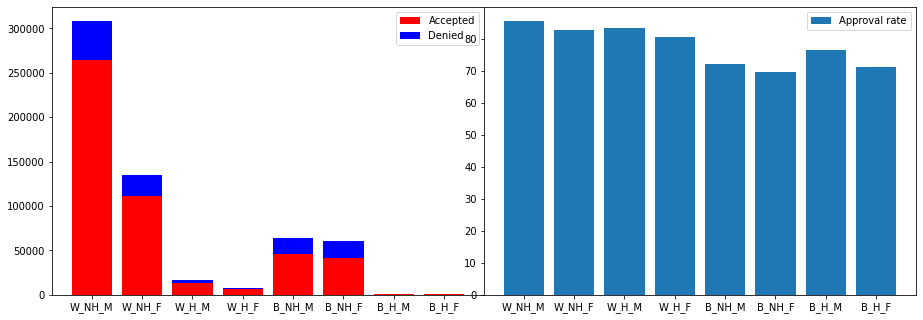

[85.59, 82.53, 83.38, 80.42, 72.14, 69.51, 76.55, 71.14]

In [12]:
subgroups = show_subgroups(subsample,True,True)
subgroups[4]

contribution to total approvals: [0.544, 0.23, 0.028, 0.013, 0.096, 0.086, 0.002, 0.001]
contribution to total amount   : [0.519, 0.228, 0.027, 0.013, 0.108, 0.101, 0.002, 0.002]


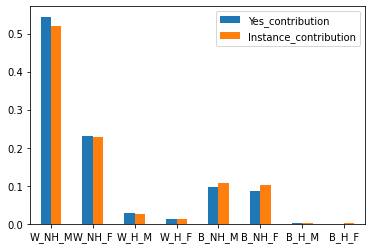

In [13]:
#print([round(subgroups[2][s] / len(subgroups[0][s]),3) for s in range(len(subgroups[0]))]) #print(subgroups[4]) #the same
yes_contribution = [round(s / sum(subgroups[2]),3) for s in subgroups[2]]
instance_contribution = [round(len(s) / len(subsample),3) for s in subgroups[0]]
print("contribution to total approvals:",yes_contribution)
print("contribution to total amount   :",instance_contribution)
plot_contribution = pd.DataFrame({'Yes_contribution': yes_contribution,
                   'Instance_contribution': instance_contribution}, index=subgroups[1])
ax = plot_contribution.plot.bar(rot=0)

In [14]:
"""
subgroups = []
subgroups_names = []
R = ["W","B"]
E = ["NH","H"]
S = ["M","F"]
for option in [0,1]:
  for option2 in [0,1]:
    for option3 in [0,1]:
        subgroups.append(subsample.loc[((subsample["applicant_race-1"]==option) & (subsample["applicant_ethnicity-1"]==option2) & (subsample["applicant_sex"]==option3))])
        subgroups_names.append(R[option-1]+"_"+E[option2-1]+"_"+S[option3-1])
len(subgroups)
"""

'\nsubgroups = []\nsubgroups_names = []\nR = ["W","B"]\nE = ["NH","H"]\nS = ["M","F"]\nfor option in [0,1]:\n  for option2 in [0,1]:\n    for option3 in [0,1]:\n        subgroups.append(subsample.loc[((subsample["applicant_race-1"]==option) & (subsample["applicant_ethnicity-1"]==option2) & (subsample["applicant_sex"]==option3))])\n        subgroups_names.append(R[option-1]+"_"+E[option2-1]+"_"+S[option3-1])\nlen(subgroups)\n'

In [15]:
"""
subgroups_app = []
subgroups_dec = []
percent = []
for s in subgroups:
  subgroups_app.append(len(s[s["action_taken"]==1]))
  subgroups_dec.append(len(s[s["action_taken"]==0]))
  percent.append(round(100*len(s[s["action_taken"]==1])/len(s),2))
  print(len(s[s["action_taken"]==1]),len(s[s["action_taken"]==0]),round(100*len(s[s["action_taken"]==1])/len(s),2),"%")


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(subgroups_names,subgroups_app, color='r')
ax.bar(subgroups_names,subgroups_dec, bottom=subgroups_app, color='b')
ax.legend(labels=['Accepted', 'Denied'])
plt.show()
"""

'\nsubgroups_app = []\nsubgroups_dec = []\npercent = []\nfor s in subgroups:\n  subgroups_app.append(len(s[s["action_taken"]==1]))\n  subgroups_dec.append(len(s[s["action_taken"]==0]))\n  percent.append(round(100*len(s[s["action_taken"]==1])/len(s),2))\n  print(len(s[s["action_taken"]==1]),len(s[s["action_taken"]==0]),round(100*len(s[s["action_taken"]==1])/len(s),2),"%")\n\n\nfig = plt.figure()\nax = fig.add_axes([0,0,2,2])\nax.bar(subgroups_names,subgroups_app, color=\'r\')\nax.bar(subgroups_names,subgroups_dec, bottom=subgroups_app, color=\'b\')\nax.legend(labels=[\'Accepted\', \'Denied\'])\nplt.show()\n'

In [16]:
"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(65, 90)
ax.bar(subgroups_names,percent)
ax.legend(labels=['Approval rate'])
plt.show()
"""

"\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\nax.set_ylim(65, 90)\nax.bar(subgroups_names,percent)\nax.legend(labels=['Approval rate'])\nplt.show()\n"

In [17]:
"""
for i in range(simulatedpeopleN):
  properties_i = {"ID":i,"Happiness":0,"Money":random.randint(0,1000),"NeedofMoney":random.randint(1,1000)}
  properties_i['Happiness'] = 100 * properties_i['Money'] / properties_i['NeedofMoney']
  dicPeople[i] = properties_i
print([item["Happiness"] for item in dicPeople.values() if item["Happiness"]>50])
"""
import math

#functions: 1-have/need, 2-need/70K limit, 3-suma de individus happy, dues persones 25% happy sumades son el mateix que una 50%?
def dimReturns(had,need): #https://stackoverflow.com/questions/2813621/how-do-you-create-a-formula-that-has-diminishing-returns
  #x = had/need
  #return 1 / (1 + math.exp(-x))
  #return (had*had) / (had*need) + 0
  #print(had,need)
  x = had/max(had,need) #SUPER REVISABLE TOT (aixo es per evitar divisio per 0 i/o overflow)
  return 100*(1/(1+100000**-(x-0.5)))

class Person():
  def __init__(self,i,p):
        self.id = i
        self.balance = 0 #could be a different initial b for each
        self.petition = p
        #self.need = n
        self.happiness = 0.0
        self.status = -1
  def updateH(self):
    self.happiness = dimReturns(self.balance,self.petition)
    return self.happiness

In [ ]:
print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))
print(len(subsample),len(subsample.columns),subsample.isnull().values.sum())

#thr=0.25
#for col in subsample.columns:
#  if (subsample[col].isnull().sum()>thr*len(subsample)):
    #subsample.drop(columns=[col])
#    print(col)

#subsample = subsample.dropna(axis=1,thresh=thr*len(subsample))
#subsample = subsample.dropna(axis=0)

# Iterate over each column of cc_apps
for col in subsample.columns:
    # Check if the column is of object type
    if subsample[col].dtypes == 'object':
        # Impute with the most frequent value
        subsample = subsample.fillna(subsample[col].value_counts().index[0])


print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

# Count the number of NaNs in the dataset and print the counts to verify
print(len(subsample),len(subsample.columns),subsample.isnull().values.sum())


485315 109127
594442 99 17781554


In [ ]:
subsample["action_taken"].unique()

In [ ]:
# Import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

#oe = OrdinalEncoder() 

#for col in subsample.columns:
#    if subsample[col].dtype=='object':
#        subsample[col] = oe.fit_transform(subsample[[col]])

In [ ]:
cols = [f_ for f_ in subsample.columns if subsample[f_].dtype != 'object']
features = cols

list_to_remove = ['action_taken','purchaser_type',
                  'denial_reason_1','denial_reason_2','denial_reason_3','sequence_number','application_date_indicator']

features = list(set(cols).difference(set(list_to_remove)))

X = subsample[features]
y = subsample['action_taken']

In [ ]:
from collections import Counter

#DISTRIBUTIONS attempt

In [ ]:
sg = show_subgroups(create_df(X,X.columns,y,"action_taken"),False,False)
nested = []
#nested_params = []
for s in sg[0]:
  nested.append({})
  sx = s.loc[:, s.columns != "action_taken"]
  sy = s.loc[:, s.columns == "action_taken"]
  nested[-1]["all"] = [sx,sy]
  nested[-1]["0"] = [sx.loc[sy["action_taken"]==0],sy.loc[sy["action_taken"]==0]]
  nested[-1]["1"] = [sx.loc[sy["action_taken"]==1],sy.loc[sy["action_taken"]==1]]
  #print(nested[-1]["1"][0][:10])

<Figure size 432x288 with 0 Axes>

#attempt

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
i=0
for n in nested:
  distr_k = multivariate_normal()
  distr_0 = multivariate_normal(mean=n["0"][0].mean(), cov=n["0"][0].cov(), allow_singular=True)
  distr_1 = multivariate_normal(mean=n["1"][0].mean(), cov=n["1"][0].cov(), allow_singular=True)
  #k_x = distr_1.rvs(size = 1)
  k_x = n["all"][0][:1]
  p = multivariate_normal.pdf(k_x,mean=n["all"][0].mean(), cov=n["all"][0].cov(), allow_singular=True)
  p0 = multivariate_normal.pdf(k_x,mean=n["0"][0].mean(), cov=n["0"][0].cov(), allow_singular=True)
  p1 = multivariate_normal.pdf(k_x,mean=n["1"][0].mean(), cov=n["1"][0].cov(), allow_singular=True)
  print(i,p,p0,p1)
  #print(i,len([i for i in range(p0.size) if p0[i]>p1[i]])/len(n["all"][0]))
  i+=1

0 7.645093381210083e-44 1.3391911966274055e-39 1.0756922252402784e-45
1 2.5907545387264916e-38 2.8288954882611165e-35 2.324594795790865e-43
2 1.2841149585158517e-41 1.4443195277290934e-41 1.2028001795470076e-41
3 2.0604776115099414e-40 5.891990138779427e-41 1.6748725160776292e-39
4 2.0538262724573217e-42 1.5588198484004462e-41 3.67656226456395e-41
5 1.3628486434952966e-41 2.1030629505238667e-41 1.794172524122084e-40
6 2.028605566636573e-44 1.3156093118943663e-43 6.613761208991785e-44
7 2.725849256510848e-44 4.886692878597089e-45 7.905600224298397e-47


#attempt

In [ ]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

In [ ]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2, allow_singular=True)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1, allow_singular=True)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)
    #print(eval1)
    return(eval1)

In [ ]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0
    #print(eval1)
    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])
        #print(i,"num_mu1",num_mu1)
        #print(eval1[i], d[i])
        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]
    #print("coefs:",num_mu1,din_mu1)
    #print("DIV:",num_mu1/din_mu1)
    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    #print(i)
    return(lis2)

In [ ]:
len(nested[0]["all"][0].values)

308658

In [ ]:
d = nested[0]["all"][0].values
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    #print(lis1)
    aux = Estep(lis1)
    lis2 = Mstep(aux)
    lis1=lis2

#attempt

In [ ]:
def learn_params(x_labeled, y_labeled):
    n = x_labeled.shape[0]
    phi = x_labeled[y_labeled == 1].shape[0] / n
    mu0 = np.sum(x_labeled[y_labeled == 0], axis=0) / x_labeled[y_labeled == 0].shape[0]
    mu1 = np.sum(x_labeled[y_labeled == 1], axis=0) / x_labeled[y_labeled == 1].shape[0]
    sigma0 = np.cov(x_labeled[y_labeled == 0].T, bias=True)
    sigma1 = np.cov(x_labeled[y_labeled == 1].T, bias=True)
    return {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}

In [ ]:
def GMM_sklearn(x, weights=None, means=None, covariances=None):
    model = GaussianMixture(n_components=2,
                            covariance_type='full',
                            tol=0.01,
                            max_iter=1000,
                            weights_init=weights,
                            means_init=means,
                            precisions_init=covariances)
    model.fit(x)
    print("\nscikit learn:\n\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (model.weights_[1], model.means_[0, :], model.means_[1, :], model.covariances_[0, :], model.covariances_[1, :]))
    return model.predict(x), model.predict_proba(x)[:,1]

In [ ]:
#https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137
learned_params = learn_params(nested[0]["all"][0], nested[0]["all"][1])
weights = [1 - learned_params["phi"], learned_params["phi"]]
means = [learned_params["mu0"], learned_params["mu1"]]
covariances = [learned_params["sigma0"], learned_params["sigma1"]]
sklearn_forecasts, posterior_sklearn = GMM_sklearn(nested[0]["all"][0].values, weights, means, covariances)

In [ ]:
listaux = lis1.copy()

In [ ]:
len(listaux)
listaux

#attempt

In [ ]:
bias_to_remove = ['co-applicant_sex_observed','applicant_ethnicity_observed','applicant_sex','applicant_sex_observed','applicant_race-1',
                  'co-applicant_race_observed', 'co-applicant_sex', 'applicant_race_observed','co-applicant_ethnicity_observed',
                  'applicant_ethnicity-1']

unbiased_features = list(set(X.columns).difference(set(bias_to_remove)))

Xun = X[unbiased_features]
yun = y


scaler = MinMaxScaler(feature_range=(0, 1))
scaledXun = scaler.fit_transform(Xun)

un_model = LogisticRegression(solver="liblinear")

scores_dict = cross_validate(model,scaledXun,yun,cv=5, return_estimator=True)
#model = first_part_scores_dict["estimator"][0]
un_scores_dict

{'estimator': [LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear')],
 'fit_time': array([25.21125627, 23.96922207, 24.72865844, 19.48442936, 23.75283837]),
 'score_time': array([0.05283666, 0.06069016, 0.05272746, 0.05268192, 0.06076002]),
 'test_score': array([0.9829946 , 0.97584618, 0.97352614, 0.98278994, 0.96663148])}

In [ ]:
for i in range(len(Xun.columns)):
  print(Xun.columns[i], un_scores_dict["estimator"][0].coef_[0][i])

tract_owner_occupied_units -2.2429365979795075
open-end_line_of_credit 2.450211359804187
loan_amount 0.5852849665518339
reverse_mortgage 3.2410012762987277
preapproval -3.50028979915615
tract_minority_population_percent -1.040936205101247
tract_one_to_four_family_homes 3.5798383570146286
loan_type 0.014405187046478852
interest_only_payment -0.24338270817847105
loan_purpose -0.551619553508413
occupancy_type 4.073871608045861
manufactured_home_land_property_interest 2.0357344191458946
tract_median_age_of_housing_units 0.22263728867737273
business_or_commercial_purpose 1.0770925950999617
hoepa_status -22.692710583208665
construction_method -2.0412512230340285
initially_payable_to_institution -1.259686733200324
aus-1 -0.9136846648818797
applicant_credit_score_type -0.6893070854711109
ffiec_msa_md_median_family_income 1.316011156259778
tract_to_msa_income_percentage 1.3387752275421008
submission_of_application 2.554633345134244
co-applicant_credit_score_type -8.419360794080873
other_nonamor

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaledX = scaler.fit_transform(X)

model = LogisticRegression(solver="liblinear")

all_scores_dict = cross_validate(model,scaledX,y,cv=5, return_estimator=True)
#model = first_part_scores_dict["estimator"][0]
all_scores_dict

{'estimator': [LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear'),
  LogisticRegression(solver='liblinear')],
 'fit_time': array([36.21239567, 36.51741195, 26.67965293, 29.75389361, 26.56853318]),
 'score_time': array([0.07117581, 0.0815289 , 0.06952119, 0.06972837, 0.0720849 ]),
 'test_score': array([0.98357154, 0.97629628, 0.9743936 , 0.98331778, 0.96719205])}

In [ ]:
for i in range(len(X.columns)):
  print(X.columns[i], all_scores_dict["estimator"][0].coef_[0][i])

co-applicant_sex_observed 3.6167132127574573
tract_owner_occupied_units -1.6549386216252377
open-end_line_of_credit 2.2558452856434066
reverse_mortgage 2.4245752952530673
preapproval -3.4534612981975705
loan_amount 0.35387494036837974
tract_minority_population_percent -0.14970147222047087
tract_one_to_four_family_homes 3.337852999895463
applicant_race-1 -0.9522496589569264
loan_type 0.15326074039171317
applicant_ethnicity_observed 2.0748055407111106
interest_only_payment -0.18084313433267596
loan_purpose -0.5930923613690036
applicant_sex -0.08508974336931566
occupancy_type 4.042845349876687
manufactured_home_land_property_interest 2.3489701018331592
tract_median_age_of_housing_units 0.08930039343047698
applicant_sex_observed -0.7064799498141451
business_or_commercial_purpose 1.0164178508827169
hoepa_status -22.71973135368828
construction_method -1.9623622281277544
co-applicant_race_observed -0.11764086755918696
initially_payable_to_institution -1.5685044190585224
aus-1 -1.6613509499307

In [ ]:
import math
def partitions(n_partitions, X, y):
  X_partitions = []
  y_partitions = []
  size_partitions = math.floor(len(X)/n_partitions)
  for p in range(n_partitions):
    X_partitions.append(X[p*size_partitions:(p+1)*size_partitions])  
    y_partitions.append(y[p*size_partitions:(p+1)*size_partitions])
  print(len(X), [sum(len(item) for item in X_partitions)], len(X_partitions[0]))
  return X_partitions, y_partitions

In [ ]:
import math
def partitions_homo(n_partitions, X, y):
  X_partitions = []
  y_partitions = []
  X_app = X[y==1]
  X_dec = X[y==0]
  size_app = math.floor(len(X_app)/n_partitions)
  size_dec = math.floor(len(X_dec)/n_partitions)

  print(len(X),len(X_app)+len(X_dec),len(X_app),len(X_dec))
  print(size_app+size_dec, size_app, size_dec)
  size_partitions = size_app+size_dec
  for p in range(n_partitions):
    X_partitions.append(np.concatenate((X_app[p*size_app:(p+1)*size_app],X_dec[p*size_dec:(p+1)*size_dec])))
    y_partitions.append(np.concatenate((y[y==1][p*size_app:(p+1)*size_app],y[y==0][p*size_dec:(p+1)*size_dec])))
    #print(len(X_partitions[-1]),len(y_partitions[-1]))
  print(len(X), [sum(len(item) for item in X_partitions)], len(X_partitions[0]))
  return X_partitions, y_partitions
#partitions_homo(100,X,y)

In [ ]:
X_fractions, y_fractions = partitions_homo(100, X, y)

scaler = MinMaxScaler(feature_range=(0, 1))
for x in range(len(X_fractions)):
  X_fractions[x] = scaler.fit_transform(X_fractions[x])

model = LogisticRegression(solver="liblinear")

first_part_scores_dict = cross_validate(model,X_fractions[0],y_fractions[0],cv=5, return_estimator=True)
model = first_part_scores_dict["estimator"][0] 
model.score(X_fractions[1],y_fractions[1])


1221961 1221961 998322 223639
12219 9983 2236
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 12219
12219 

0.9798674195924381

In [ ]:
for x in range(len(X_fractions)):
  print(x,show_subgroups(create_df(X_fractions[x],X.columns,y_fractions[x],"action_taken"),False,False)[4])

0 [86.45, 84.77, 76.55, 77.6, 56.61, 53.25, 72.73, 42.86]
1 [87.31, 82.45, 79.0, 82.69, 67.08, 58.32, 75.0, 66.67]
2 [87.84, 81.27, 75.57, 59.86, 64.3, 58.85, 91.67, 38.1]
3 [85.21, 85.22, 83.47, 84.04, 65.97, 72.47, 72.73, 57.14]
4 [84.94, 81.84, 79.22, 64.2, 75.77, 74.12, 77.27, 55.56]
5 [85.14, 80.23, 80.49, 82.01, 73.66, 73.06, 90.0, 75.0]
6 [85.32, 82.16, 77.01, 77.08, 69.67, 69.29, 78.57, 84.21]
7 [84.97, 84.49, 84.7, 79.03, 69.97, 71.27, 63.64, 55.0]
8 [85.61, 81.48, 68.64, 55.91, 65.46, 65.93, 62.5, 33.33]
9 [87.02, 81.64, 75.82, 68.07, 69.43, 62.06, 61.9, 69.23]
10 [85.26, 83.15, 80.83, 81.11, 69.73, 70.94, 62.5, 85.0]
11 [86.36, 81.18, 79.65, 71.64, 74.15, 71.3, 88.89, 63.16]
12 [85.76, 82.38, 71.6, 67.74, 77.23, 71.74, 70.59, 73.91]
13 [84.88, 81.76, 75.12, 75.25, 76.16, 72.38, 73.33, 68.75]
14 [86.4, 85.24, 74.55, 72.53, 70.42, 64.1, 56.25, 52.38]
15 [83.26, 84.12, 77.73, 83.51, 73.11, 76.72, 54.55, 52.94]
16 [83.73, 81.86, 89.04, 86.13, 74.82, 74.79, 61.9, 83.33]
17 [84.5,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20 [87.89, 73.68, 93.83, 85.71, 81.48, 68.82, 93.33, 85.71]
21 [89.37, 80.6, 93.22, 89.58, 69.88, 56.38, 90.0, 91.67]
22 [89.19, 81.83, 89.74, 73.68, 58.43, 48.55, 90.91, 60.0]
23 [86.54, 81.41, 81.78, 79.55, 69.54, 67.73, 84.62, 71.43]
24 [83.21, 78.34, 79.79, 73.33, 80.8, 84.92, 75.0, 75.0]
25 [85.12, 77.31, 84.54, 82.53, 79.91, 71.79, 83.33, 77.78]
26 [85.25, 79.61, 86.15, 79.31, 75.04, 69.41, 84.21, 90.0]
27 [83.56, 81.91, 92.05, 85.07, 79.19, 74.47, 92.86, 80.0]
28 [89.2, 76.67, 93.18, 80.61, 77.48, 57.72, 87.5, 46.15]
29 [88.4, 85.91, 73.52, 69.06, 64.11, 61.13, 81.82, 90.0]
30 [84.54, 88.49, 76.78, 81.58, 62.49, 69.46, 44.44, 82.35]
31 [85.51, 83.97, 90.71, 90.25, 68.86, 68.74, 80.0, 52.38]
32 [81.36, 81.7, 96.46, 96.23, 72.29, 74.78, 80.77, 80.77]
33 [84.53, 86.09, 90.84, 86.18, 64.97, 70.57, 68.42, 82.35]
34 [83.99, 85.06, 82.33, 79.84, 70.26, 67.8, 94.12, 92.31]
35 [87.18, 86.91, 78.54, 74.0, 64.9, 58.17, 80.95, 52.17]
36 [85.1, 79.25, 75.99, 71.24, 78.38, 77.46, 84.21, 69.23

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
[len(y_fractions[f][y_fractions[f]==1])/len(y_fractions[f]) for f in range(len(y_fractions))]

[0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016613471,
 0.8170063016

In [ ]:
percent_mat = []
X_cummulative = X_fractions[0]
y_cummulative = y_fractions[0]
for x in range(len(X_fractions)-1):
  i=x+1
  X_cummulative = np.concatenate((X_cummulative, X_fractions[i]))
  y_cummulative = np.concatenate((y_cummulative, model.predict(X_fractions[i])))
  model.fit(X_cummulative,y_cummulative)

  auxdf = create_df(X_cummulative,X.columns,y_cummulative,"action_taken")
  if(i%10==0):
    print(i,show_subgroups(auxdf,False,False)[4])



10 [83.42, 80.59, 78.28, 73.04, 68.4, 65.91, 72.25, 64.97]
20 [83.36, 80.75, 80.19, 75.89, 71.72, 68.74, 72.05, 67.54]
30 [82.73, 79.14, 81.09, 76.45, 70.95, 66.8, 75.34, 69.88]
40 [82.31, 79.19, 82.13, 78.45, 71.48, 67.96, 75.64, 71.89]
50 [82.16, 79.19, 81.63, 78.31, 71.17, 68.04, 75.72, 70.99]
60 [82.22, 78.79, 81.9, 78.86, 70.06, 65.72, 74.34, 67.59]
70 [82.42, 78.92, 81.66, 78.6, 69.94, 65.11, 73.96, 66.5]
80 [82.41, 78.98, 81.26, 78.15, 69.98, 65.11, 73.87, 66.69]
90 [82.31, 78.52, 81.12, 77.99, 69.62, 64.15, 73.3, 66.33]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

contribution to total approvals: [0.579, 0.24, 0.024, 0.011, 0.077, 0.067, 0.001, 0.001]
contribution to total amount   : [0.555, 0.24, 0.023, 0.011, 0.087, 0.081, 0.001, 0.001]


<Figure size 432x288 with 0 Axes>

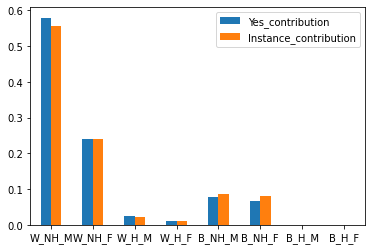

In [ ]:
#print([round(subgroups[2][s] / len(subgroups[0][s]),3) for s in range(len(subgroups[0]))]) #print(subgroups[4]) #the same
cummulative_subgroups = show_subgroups(auxdf,False,False)
yes_contribution = [round(s / sum(cummulative_subgroups[2]),3) for s in cummulative_subgroups[2]]
instance_contribution = [round(len(s) / len(auxdf),3) for s in cummulative_subgroups[0]]
print("contribution to total approvals:",yes_contribution)
print("contribution to total amount   :",instance_contribution)
plot_contribution = pd.DataFrame({'Yes_contribution': yes_contribution,
                   'Instance_contribution': instance_contribution}, index=cummulative_subgroups[1])
ax = plot_contribution.plot.bar(rot=0)

In [ ]:
originaldf = create_df(X[0:len(auxdf)],X.columns,y[0:len(auxdf)],"action_taken");
(len(y_cummulative),len(auxdf),len(originaldf))
misslabeled = pd.DataFrame(columns=X.columns)
counter=0
for i in range(len(auxdf)):
  if(auxdf.iloc[i]["action_taken"]!=originaldf.iloc[i]["action_taken"]):
    counter+=1
    misslabeled = misslabeled.append(auxdf.iloc[i])
  if (i%10000==0):
    print(i,counter,len(misslabeled),counter/len(auxdf))

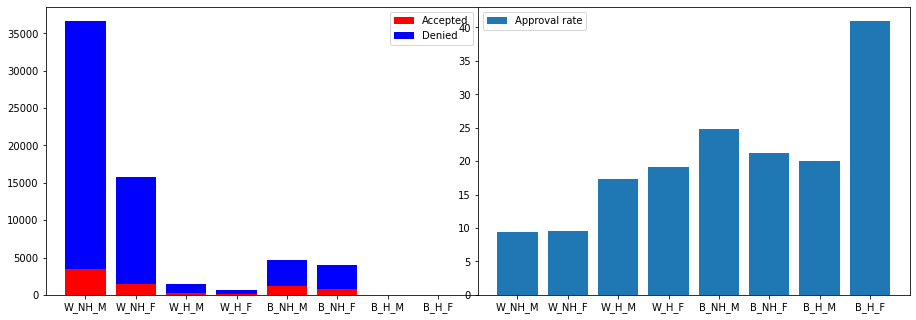

[9.45, 9.53, 17.27, 19.18, 24.8, 21.19, 20.0, 41.03]
[36707, 15822, 1436, 636, 4654, 3969, 35, 39]
[0.0541, 0.0538, 0.0503, 0.0484, 0.0437, 0.04, 0.0242, 0.0288]


In [ ]:
miss_subgroups = show_subgroups(misslabeled,True,True)
print(miss_subgroups[4])
print([len(item) for item in miss_subgroups[0]])
print([round(len(item)/len(item2),4) for item,item2 in zip(miss_subgroups[0],subgroups[0])])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


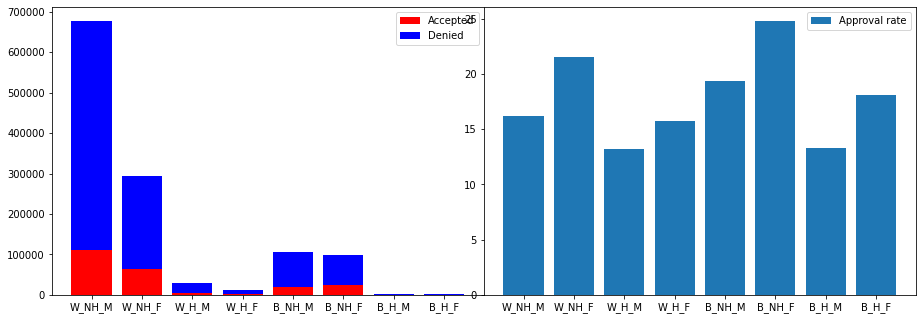

[16.2, 21.54, 13.19, 15.75, 19.33, 24.81, 13.27, 18.08]
[678024, 293856, 28537, 13131, 106438, 99173, 1447, 1355]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
model = LogisticRegression(solver="liblinear")
first_part_scores_dict = cross_validate(model,X_fractions[90],y_fractions[90],cv=5, return_estimator=True)
model = first_part_scores_dict["estimator"][0] 
original_pred = create_df(X,X.columns,model.predict(X),"action_taken")
original_pred_subgroups = show_subgroups(original_pred,True,True)
print(original_pred_subgroups[4])
print([len(item) for item in original_pred_subgroups[0]])
print([round(len(item)/len(item2),4) for item,item2 in zip(original_pred_subgroups[0],subgroups[0])])

In [ ]:
subgroups[4] #fatal, les etiquetes reals son mes esbiaixades que les predicted finals...

[85.55, 81.93, 82.84, 79.94, 71.03, 66.35, 74.71, 67.31]

In [ ]:
"""
10 [84.51, 81.81, 79.41, 73.13, 68.18, 65.54, 79.52, 54.41]
20 [82.94, 80.03, 77.15, 70.95, 66.9, 64.76, 73.01, 60.28]
30 [81.95, 78.98, 75.96, 71.21, 67.34, 64.76, 69.11, 60.74]
40 [81.36, 79.04, 77.45, 73.04, 68.72, 67.08, 69.18, 63.5]
50 [79.78, 75.68, 77.53, 71.57, 66.13, 62.07, 68.43, 61.71]
60 [79.83, 76.3, 78.12, 72.9, 66.17, 62.5, 69.57, 63.9]
70 [80.48, 77.38, 80.48, 76.82, 67.76, 64.74, 71.43, 66.1]
80 [81.11, 78.19, 80.96, 77.42, 69.64, 66.74, 73.26, 69.35]
90 [80.2, 77.41, 79.77, 76.32, 67.41, 65.23, 70.57, 66.71]
"""
print(model.score(scaler.fit_transform(X),y))
#print(model.score(X_cummulative,y_cummulative))

0.9379030918335364


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=2)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test,
                                y_test,
                                test_size=0.33,
                                random_state=2)

In [ ]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
rescaledX_test1 = scaler.fit_transform(X_test1)
rescaledX_test2 = scaler.fit_transform(X_test2)

In [ ]:

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(solver="liblinear")

scores_dict = cross_validate(logreg,rescaledX_train,y_train,cv=5, return_estimator=True)
best = scores_dict["estimator"][0] 
# Fit logreg to the train set
#logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)
#from collections import Counter
#counterpred = Counter(y_pred)
#countertest = Counter(y_test)
#print(counterpred, countertest)
#print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

logregRescaled = LogisticRegression(solver="liblinear")
logregRescaled.fit(rescaledX_train, y_train)

logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logregRescaled.predict(rescaledX_test1)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test1)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", logregRescaled.score(rescaledX_test1, y_test1))


y_pred = logregRescaled.predict(rescaledX_test2)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test2)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", logregRescaled.score(rescaledX_test2, y_test2))

print("Accuracy of logistic regression classifier: ", logreg.score(X_test1, y_test1))
print("Accuracy of logistic regression classifier: ", logreg.score(X_test2, y_test2))



Counter({1: 198709, 0: 46905}) Counter({1: 200515, 0: 45099}) Counter({1: 998322, 0: 223639})
Accuracy of logistic regression classifier:  0.9773954253422036
Counter({1: 98016, 0: 22959}) Counter({1: 98849, 0: 22126}) Counter({1: 998322, 0: 223639})
Accuracy of logistic regression classifier:  0.9772928290969208
Accuracy of logistic regression classifier:  0.8218179745454249
Accuracy of logistic regression classifier:  0.8222938623682579


In [ ]:

y_pred = best.predict(rescaledX_test1)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test1)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", best.score(rescaledX_test1, y_test1))


y_pred = best.predict(rescaledX_test2)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test2)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", best.score(rescaledX_test2, y_test2))

Counter({1: 198726, 0: 46888}) Counter({1: 200515, 0: 45099}) Counter({1: 998322, 0: 223639})
Accuracy of logistic regression classifier:  0.9774483539211934
Counter({1: 98022, 0: 22953}) Counter({1: 98849, 0: 22126}) Counter({1: 998322, 0: 223639})
Accuracy of logistic regression classifier:  0.9773093614383137


In [ ]:
y_pred_NO = best.predict(rescaledX_test[y_test==0])
counterpred_NO = Counter(y_pred_NO)
print(counterpred_NO)
print("Accuracy: ", best.score(rescaledX_test[y_test==0], y_test[y_test==0]))

Counter({0: 64391, 1: 2834})
Accuracy:  0.9578430643361845


In [ ]:
# Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate a LogisticRegression classifier with default parameter values
dtcRescaled = DecisionTreeClassifier()
dtc = DecisionTreeClassifier()

# Fit logreg to the train set
dtcRescaled.fit(rescaledX_train, y_train)
dtc.fit(X_train, y_train)

y_predRescaled = dtcRescaled.predict(rescaledX_test)
y_pred = dtc.predict(X_test)

counterpredRescaled = Counter(y_predRescaled)
counterpred = Counter(y_pred)
countertest = Counter(y_test)
counterall = Counter(y)
print(counterpredRescaled,counterpred, countertest, counterall)

print("Accuracy of DecisionTreeClassifier: ", dtcRescaled.score(rescaledX_test, y_test))
print("Accuracy of DecisionTreeClassifier: ", dtc.score(X_test, y_test))

Counter({1: 299033, 0: 67556}) Counter({1: 299394, 0: 67195}) Counter({1: 299364, 0: 67225}) Counter({1: 998322, 0: 223639})
Accuracy of DecisionTreeClassifier:  0.9966856615992297
Accuracy of DecisionTreeClassifier:  0.9985542392161249


In [ ]:
y_pred_NO = dtc.predict(X_test.loc[y_test==0])
counterpred_NO = Counter(y_pred_NO)
print(counterpred_NO)

Counter({0: 66945, 1: 280})


In [ ]:
#from lightgbm import LGBMClassifier
#from sklearn.metrics import roc_curve, auc  #Metrics
#https://www.kaggle.com/code/ambarish/machine-learning-explainability-omnibus/notebook#Modelling
#logreg = LGBMClassifier(random_state=1).fit(rescaledX_train, y_train)
#y_pred = logreg.predict_proba(X_test)
#print(y_pred)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
#auc(fpr, tpr)


In [ ]:
dicPeople = {}
#beta a actualitzar
beta_params = {'a': 3.107176300758434, 'b': 16.54733270043585, 'loc': -28571.959896180033, 'scale': 1537159.8560307096}
#beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}

for i in range(len(X_test)):
  loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  #loan = subsample.iloc[i]["loan_amount"]*1000 #TODO:FATAL, els loans no concorden amb els individus a X_test en absolut
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeople[i] = p
#print(len(dicPeople.keys()))
#print([(item.id,item.petition) for item in dicPeople.values() if item.happiness<50])

In [ ]:
print(np.unique(y_pred))

[0 1]


In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]==1):
    dicPeople[i].balance = dicPeople[i].petition
  dicPeople[i].updateH()
  dicPeople[i].status = y_pred[i]

#print([(item.id,item.petition,item.happiness,item.status) for item in dicPeople.values() if item.happiness<50])

[29866203.696074534]


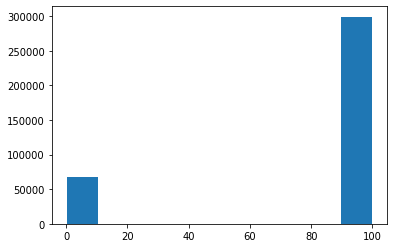

In [ ]:
h_arr = [(item.happiness) for item in dicPeople.values()]
plt.hist(h_arr)
print([sum(item.happiness for item in dicPeople.values())])

In [ ]:
#print(X.columns, X.iloc[0])
#categorical_col=["hoepa_status", "loan_type", "as_of_year", "applicant_ethnicity", "county_code", "state_code", "lien_status", "loan_purpose", "co_applicant_race_1", "co_applicant_ethnicity", "property_type", "owner_occupancy", "applicant_sex", "preapproval", "agency_code", "applicant_race_1", "co_applicant_sex"]
noncategorical_col = ["loan_amount","tract_minority_population_percent","tract_median_age_of_housing_units",
                      "derived_msa-md","income","tract_population","tract_one_to_four_family_homes",
                      "tract_owner_occupied_units","ffiec_msa_md_median_family_income","tract_to_msa_income_percentage"]
categorical_col=list(set(X.columns).difference(set(noncategorical_col)))
categorial_ind = []
for c in categorical_col:
  categorial_ind.append(list(X.columns).index(c))

In [ ]:
from imblearn.over_sampling._smote.base import SMOTENC
from imblearn.over_sampling import SMOTE

#oversample = SMOTE()
oversample = SMOTENC(categorical_features=categorial_ind)
Xsmote, ysmote = oversample.fit_resample(rescaledX_test2, y_test2)


KeyboardInterrupt: ignored

In [ ]:
#for c in range(len(subsample.columns)):
#  print(c, subsample.columns[c], subsample.iloc[0][subsample.columns[c]])

In [ ]:
print(Counter(ysmote))

In [ ]:
newX = Xsmote[len(rescaledX_test2):len(Xsmote)]
newy = ysmote[len(y_test2):len(ysmote)]
counter = Counter(newy)
print(counter)

y_newpred = best.predict(newX)
print("Accuracy of logistic regression classifier: ", best.score(newX, newy))
counter = Counter(y_newpred)
print(counter)

In [ ]:
X_smotetrain, X_smotetest, y_smotetrain, y_smotetest = train_test_split(Xsmote,
                                ysmote,
                                test_size=0.1,
                                random_state=2)

print(Counter(y_smotetrain))

print(Counter(y_smotetest))

In [ ]:
print("Accuracy of logistic regression classifier: ", best.score(Xsmote, ysmote)) 
print("Accuracy of logistic regression classifier: ", best.score(newX, newy)) 
#newy

In [ ]:
logregSmote = LogisticRegression(solver="liblinear")

# Fit logreg to the train set
logregSmote.fit(X_smotetrain, y_smotetrain)

#y_smotepred = logregSmote.predict(X_smotetest)
print("Accuracy of logistic regression classifier: ", logregSmote.score(X_smotetest, y_smotetest)) 

In [ ]:
#auxnparray = X_test.copy()
#print(auxnparray.shape)
#auxdf = pd.DataFrame(auxnparray, columns = X.columns)
#auxdf["action_taken"] = best.predict(rescaledX_test)

In [ ]:
smotepred = create_df(Xsmote,X.columns,best.predict(Xsmote),"action_taken")
smotedf = create_df(Xsmote,X.columns,ysmote,"action_taken")

In [ ]:
subgroups2 = show_subgroups(smotedf,True,True)

In [ ]:
print(Counter(newy), len(newy[newy==0]))
smotenew = create_df(newX,X.columns,newy,"action_taken")
_ = show_subgroups(smotenew,True,True)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax.bar(subgroups[1],[len(s) for s in subgroups[0]])
ax2.bar(subgroups2[1],[len(s) for s in subgroups2[0]])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax.set_ylim(30, 90)
ax2.set_ylim(30, 90)
ax.bar(subgroups[1],subgroups[4])
ax2.bar(subgroups2[1],subgroups2[4])
plt.show()
print(subgroups[4],"\n",subgroups2[4])

In [ ]:
#smotetestpred = create_df(X_smotetest, X.columns, logregSmote.predict(X_smotetest), "action_taken")
#subgroups3 = show_subgroups(smotetestpred,True,True)

In [ ]:
df = create_df(X_smotetest, X.columns, y_smotetest, "action_taken")
print(Counter(df["action_taken"]))
subgroups4 = show_subgroups(df,True,True)
dicPeople = {}
beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}
for i in range(len(df)):
  #loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  loan = df.iloc[i]["loan_amount"]*1000
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeople[i] = p
for i in range(len(df)):
  if(df.iloc[i]["action_taken"]==1):
    dicPeople[i].balance = dicPeople[i].petition
  dicPeople[i].updateH()
  dicPeople[i].status = df.iloc[i]["action_taken"]

In [ ]:
h_arr = [(item.happiness) for item in dicPeople.values()]
plt.hist(h_arr)
print([sum(item.happiness for item in dicPeople.values())])
print(100*len(df[df['action_taken']==1]))
print(len(df),len(df[df['action_taken']==1]), len(df[df['action_taken']==0]))

In [ ]:
dicPeopleQ = {}
beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}
for i in range(len(df)):
  #loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  loan = df.iloc[i]["loan_amount"]*1000
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeopleQ[i] = p

#print(2*10**9-[sum(item.petition for item in dicPeople.values())][0])

In [ ]:
def processActionBinary(w, index, action):
  h=0
  if(action==1):
    w["dic"][index].balance = w["dic"][index].petition
    h=w["dic"][index].updateH()
    w["money"] -= w["dic"][index].petition
  w["dic"][index].status = action
  return w, h

In [ ]:
def processActionFluent(w, index, action):
  h=0
  percentage = action/100
  w["dic"][index].balance = percentage*w["dic"][index].petition
  h=w["dic"][index].updateH()
  w["money"] -= percentage*w["dic"][index].petition
  w["dic"][index].status = action
  return w, h

In [ ]:
import random
from IPython.display import clear_output
world={}
#world["dic"] = dicPeopleQ.copy()
#world["money"] = (3/3)*[sum(item.petition for item in world.values())][0]
#world["model"] = logreg
observation_space = X_smotetest
binary_space = [0,1]
fluent_space = range(0,100)
action_space = binary_space#fluent_space
processAction = processActionBinary#processActionFluent
q_table = np.zeros([len(observation_space), len(action_space)])
precomputed_labels = best.predict(X_smotetest);
for i in range(len(precomputed_labels)):
  q_table[i,1] = 100*precomputed_labels[i]
  #q_table[i,99] = 100*precomputed_labels[i]
print(100*len(precomputed_labels[precomputed_labels==1]))
print(len(precomputed_labels),len(precomputed_labels[precomputed_labels==1]), len(precomputed_labels[precomputed_labels==0]))
print(q_table)
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

In [ ]:
#max_rate=0
#max_qtable=q_table.copy()

In [ ]:
import copy
# For plotting metrics
all_epochs = []
for i in range(1, 500):
    state = 0
    world["dic"] = copy.deepcopy(dicPeopleQ)

    fraction_available = 1 #1/2 #2/3 #1
    #top_rate = 100*len(world['dic'].values()) * fraction_available*[sum(item.petition for item in world["dic"].values())][0]
    
    world["money"] = fraction_available*[sum(item.petition for item in world["dic"].values())][0]
    reward = 0
    done = False

    #q_table = max_qtable.copy()

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(action_space) # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        #print(action)
        world,reward = processAction(world,state,action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[state+1])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if (state==len(observation_space)-2 or world["money"]<=0):
          done = True
        else:
          state += 1

    #rate = [sum(item.happiness for item in world['dic'].values())][0]*world["money"]
    #if (rate/top_rate > max_rate):
    #  max_rate = rate/top_rate
    #  max_qtable = q_table.copy()

    if i % 5 == 0:
        print(f"Episode: {i}: {[sum(item.happiness for item in world['dic'].values())][0]} happiness achieved, {world['money']} remaining")#, rate = {rate/top_rate}")

print("Training finished.\n")

In [ ]:
#max_rate

In [ ]:
achieved=[sum(item.happiness for item in world['dic'].values())][0]
print(achieved)
print([max(item.happiness for item in world['dic'].values())])
print([min(item.happiness for item in world['dic'].values())])
print("maximum possible:",100*len(world['dic'].values()))
print(achieved/(100*len(world['dic'].values())))
print(fraction_available)



780332.3723712312

[99.68476908167399]

[0.0]

maximum possible: 959400

7486508780.5295925

0.6666666666666666

In [ ]:
for s in [-1,0,1]:
  print(len([item for item in world['dic'].values() if item.status==s]))

In [ ]:
world["money"]

In [ ]:
Counter(precomputed_labels)

In [ ]:
Counter(y_smotetest)